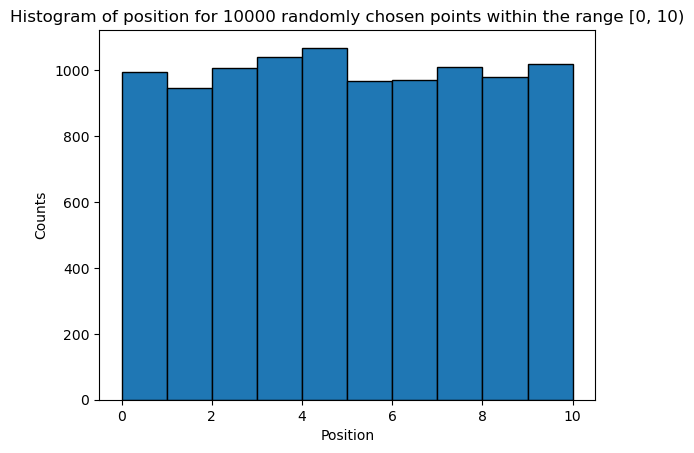

In [1]:
# 1.1 Problems, #1

import numpy as np
import matplotlib.pyplot as plt
import math

# set L
L = 10

# generate random numbers in the range [0, L)
random_numbers = np.random.uniform(0, L, size=10000)

# create and plot histogram
plt.hist(random_numbers, bins=10, edgecolor='black')
plt.title('Histogram of position for 10000 randomly chosen points within the range [0, 10)')
plt.xlabel('Position')
plt.ylabel('Counts')
plt.show()

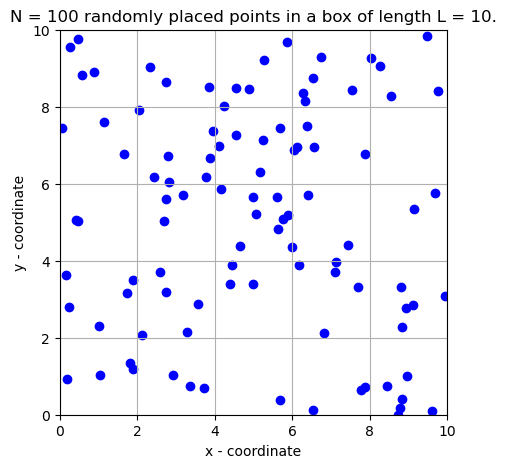

In [2]:
# 1.1 Problems, #2

import numpy as np
import matplotlib.pyplot as plt
import math

def place_objects(N, L):
    """
    randomly place N objects in a square box of length L 
    returns array of coordinates of placed objects
    """
    coordinates = np.random.uniform(0, L, size=(N, 2))
    return coordinates

N = 100
L = 10
object_coordinates = place_objects(N, L)

# plot
plt.figure(figsize=(5, 5))
plt.scatter(object_coordinates[:, 0], object_coordinates[:, 1], c='blue', marker='o')
plt.xlim(0, L)
plt.ylim(0, L)
plt.title(f'N = {N} randomly placed points in a box of length L = {L}.')
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.grid(True)
plt.show()

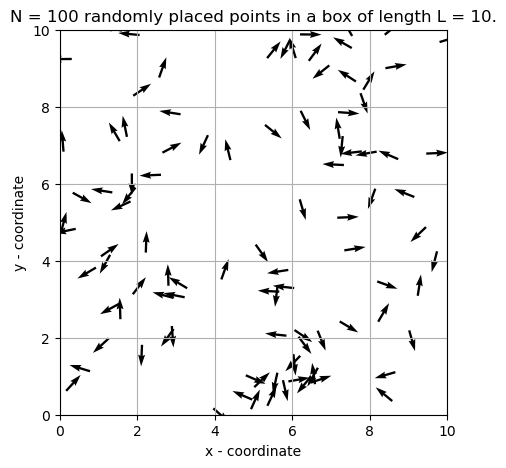

In [3]:
# 1.1 Problems, #3

import numpy as np
import matplotlib.pyplot as plt
import math

def initialize(N, L):
    x = np.random.uniform(0, L, N)
    y = np.random.uniform(0, L, N)
    theta = np.random.uniform(-math.pi, math.pi, N)
    
    return x, y, theta

N = 100  
L = 10
x, y, theta = initialize(N, L)

plt.figure(figsize=(5, 5))
plt.quiver(x, y, np.cos(theta), np.sin(theta))
plt.xlim(0, L)
plt.ylim(0, L)
plt.title(f'N = {N} randomly placed points in a box of length L = {L}.')
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


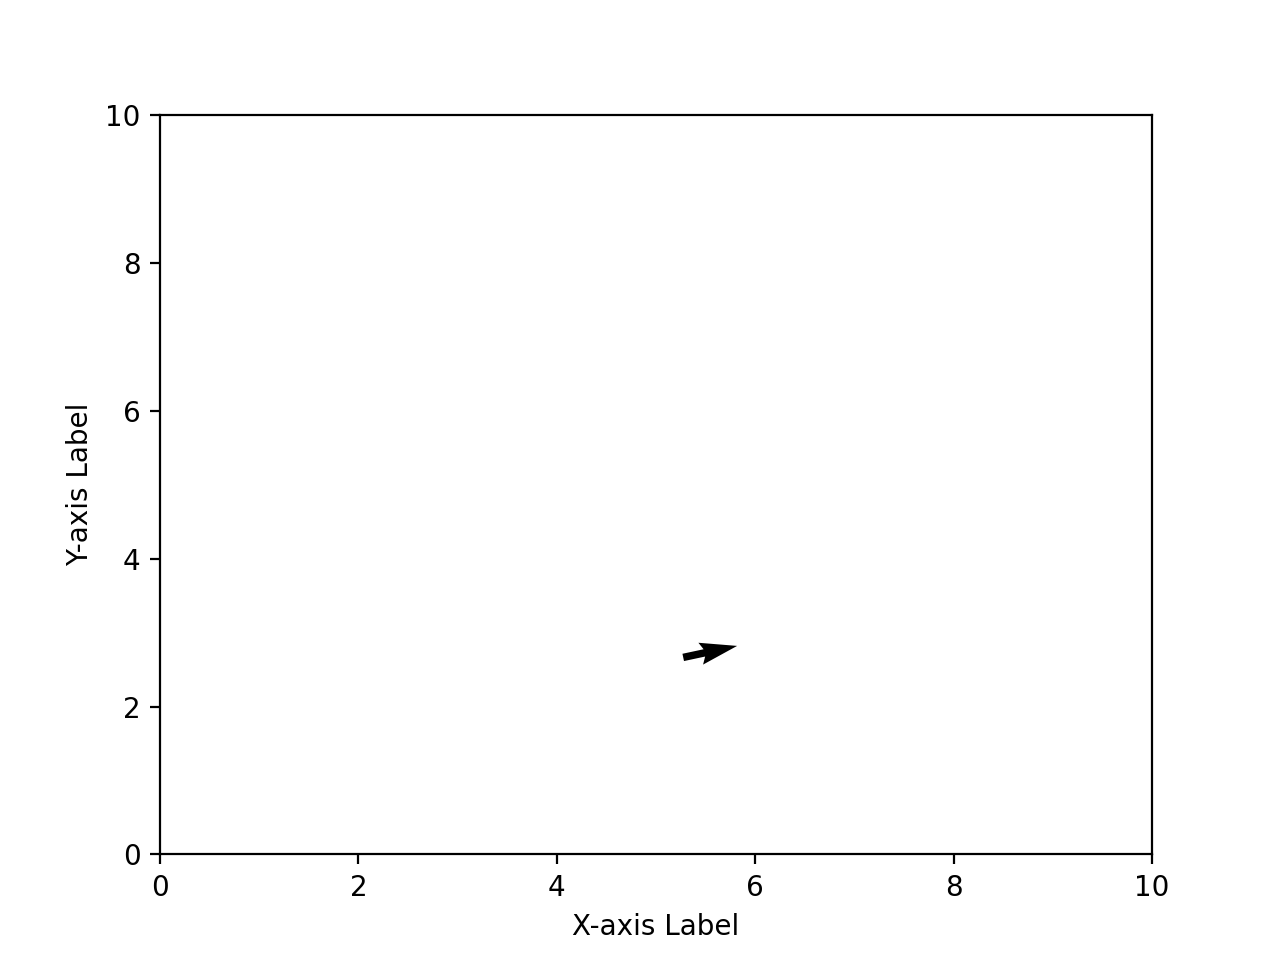

In [1]:
# 1.2 Problems, #1

import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib notebook
from matplotlib.animation import FuncAnimation

def initialize(N, L):
    x = np.random.uniform(0, L, N)
    y = np.random.uniform(0, L, N)
    theta = np.random.uniform(-math.pi, math.pi, N)
    
    return x, y, theta

# update the position with periodic boundaries
def update_position(x, y, theta, v, delta_t, L):
    x_new = (x + v * np.cos(theta) * delta_t) % L
    y_new = (y + v * np.sin(theta) * delta_t) % L
    return x_new, y_new

# simulation parameters
L = 10
N = 1
v = 1
delta_t = 1
Nsteps = 100

x, y, theta = initialize(N, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_xlabel('X-axis Label') 
ax.set_ylabel('Y-axis Label')

# update function for the animation
def update(frame):
    global x, y, theta
    # updating particle's position
    x, y = update_position(x, y, theta, v, delta_t, L)
    
    # clear previous plot
    ax.cla()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_xlabel('X-axis Label') 
    ax.set_ylabel('Y-axis Label')

    # plotting new position
    ax.quiver(x, y, np.cos(theta), np.sin(theta), color='black')

# animation object
ani = FuncAnimation(fig, update, frames=np.arange(Nsteps), interval=500)

plt.show()

<IPython.core.display.Javascript object>


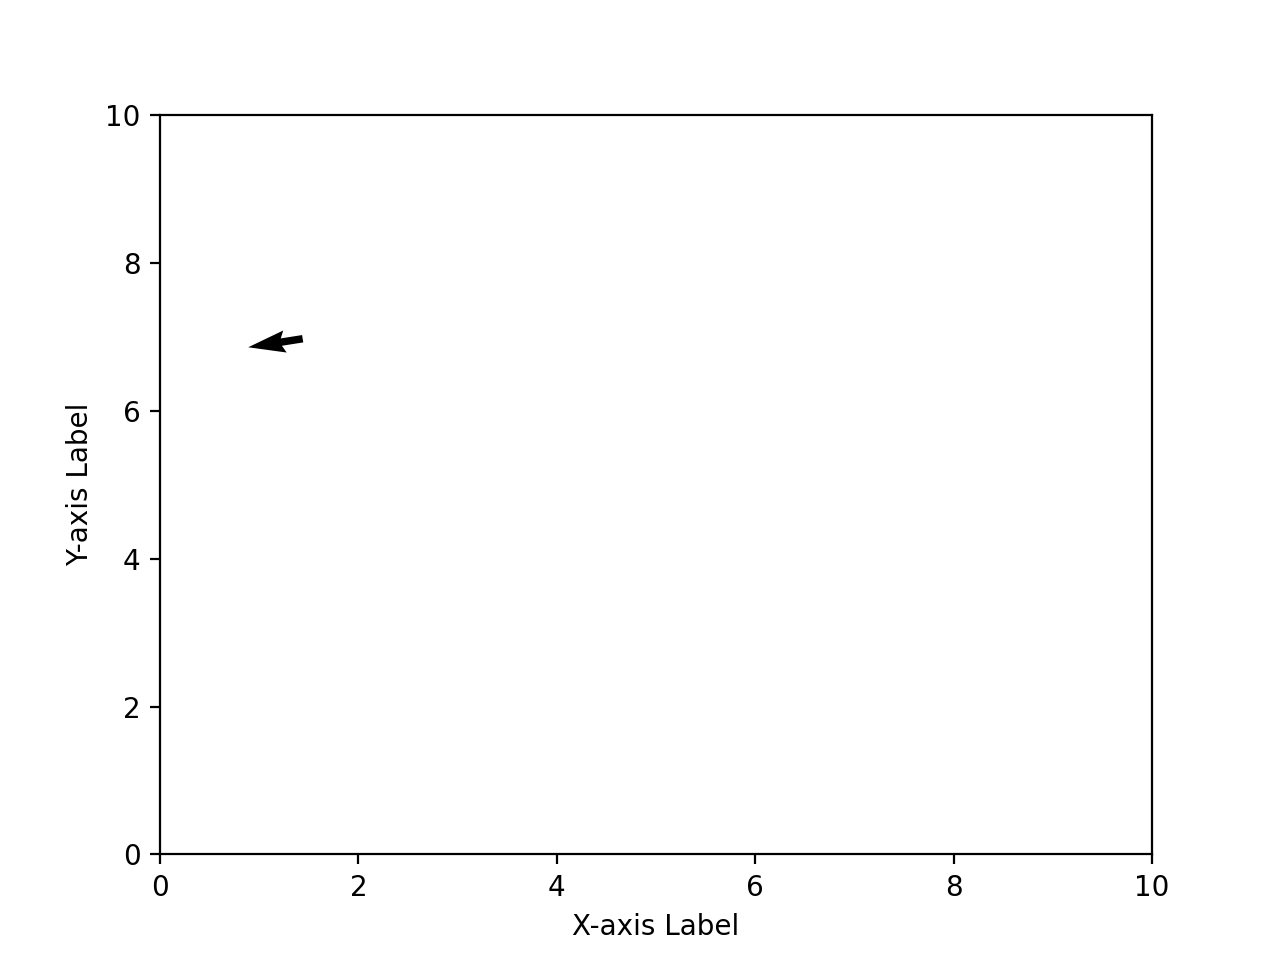

In [2]:
# 1.2 Problems, #2

import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib notebook
from matplotlib.animation import FuncAnimation

def initialize(N, L):
    x = np.random.uniform(0, L, N)
    y = np.random.uniform(0, L, N)
    theta = np.random.uniform(-math.pi, math.pi, N)
    
    return x, y, theta

def update_position_with_noise(x, y, theta, v, delta_t, L, eta):
    # update orientation with noise
    delta_theta = np.random.uniform(-eta/2, eta/2)
    theta_new = theta + delta_theta

    # update the position with periodic boundaries
    x_new = (x + v * np.cos(theta_new) * delta_t) % L
    y_new = (y + v * np.sin(theta_new) * delta_t) % L

    return x_new, y_new, theta_new

# simulation parameters
L = 10
N = 1
v = 1
delta_t = 1
Nsteps = 100
eta = 3  # angular noise

x, y, theta = initialize(N, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')  

# update function for the animation
def animate(step):
    global x, y, theta
    # updating particle's position with noise
    x, y, theta = update_position_with_noise(x, y, theta, v, delta_t, L, eta)

    # clear previous plot
    ax.cla()
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_xlabel('X-axis Label') 
    ax.set_ylabel('Y-axis Label')  

    
    # plotting new position with noise
    ax.quiver(x, y, np.cos(theta), np.sin(theta), color='black')

# animation object
ani = FuncAnimation(fig, animate, frames=Nsteps, interval=500, repeat=False)

plt.show()

<IPython.core.display.Javascript object>


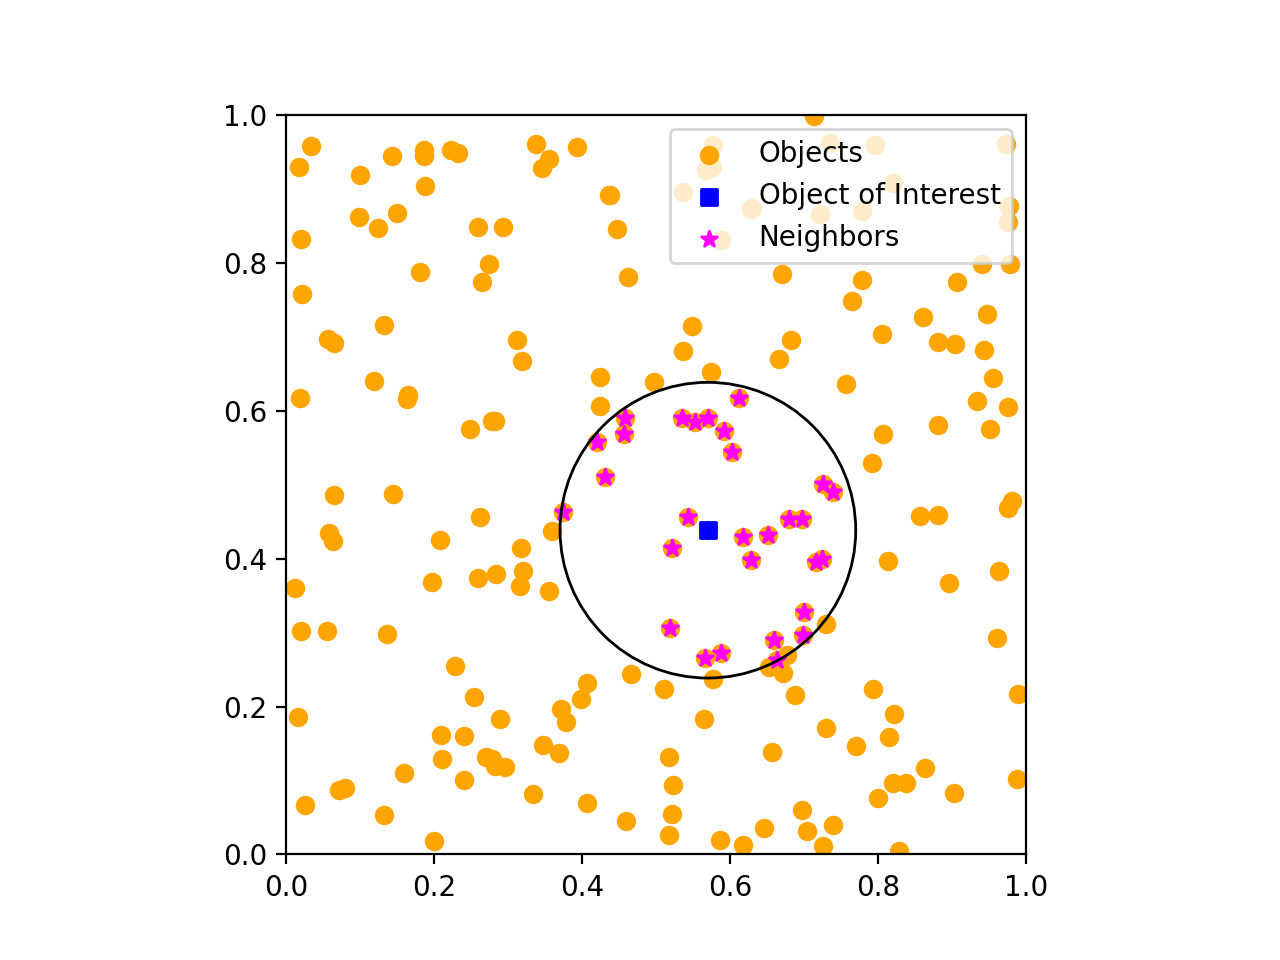

In [3]:
# 2 Problems, #1

import numpy as np
import matplotlib.pyplot as plt
import math

def initialize(N, L):
    x = np.random.uniform(0, L, N)
    y = np.random.uniform(0, L, N)
    theta = np.random.uniform(-math.pi, math.pi, N)
    
    return x, y, theta

def find_neighbors(positions, target_index, L, r0):
    """
    Finds the neighbors of an object within a radius r0 in a periodic box.
    
    Parameters:
    positions (np.array): An array of positions of all objects.
    target_index (int): The index of the target object in the positions array.
    L (float): The length of the sides of the square box (assuming a square box for simplicity).
    r0 (float): The radius within which to search for neighbors.
    
    Returns:
    neighbors (list): A list of indices of the neighboring objects.
    """
    target_position = positions[target_index]
    neighbors = []
    
    for i, position in enumerate(positions):
        if i != target_index:
            # calculate the distance considering periodic boundaries
            dx = position[0] - target_position[0]
            dy = position[1] - target_position[1]
            dx = dx - L * np.round(dx / L)
            dy = dy - L * np.round(dy / L)
            distance = np.sqrt(dx**2 + dy**2)
            
            # check if the object is within the radius r0
            if distance <= r0:
                neighbors.append(i)
                
    return neighbors

# box length and radius for neighbor search
L = 1.0
r0 = 0.2

# generate random positions for a set of objects
np.random.seed(0) 
positions = np.random.uniform(0, L, (200, 2))

# choose object
object_of_interest_index = 25
object_of_interest = positions[object_of_interest_index]

# find neighbors
neighbors_indices = find_neighbors(positions, object_of_interest_index, L, r0)

fig, ax = plt.subplots()

# plotting objects as orange circles
ax.scatter(positions[:, 0], positions[:, 1], color='orange', label='Objects')

# object of interest is blue square
ax.scatter(object_of_interest[0], object_of_interest[1], color='blue', marker='s', label='Object of Interest')

# neighbors are magenta stars
for i, neighbor_index in enumerate(neighbors_indices):
    neighbor_position = positions[neighbor_index]
    if i == 0:  # only labeling the first neighbor to avoid duplicate legend entries
        ax.scatter(neighbor_position[0], neighbor_position[1], color='magenta', marker='*', label='Neighbors')
    else:
        ax.scatter(neighbor_position[0], neighbor_position[1], color='magenta', marker='*')
        
# drawing circle around the object of interest to show the search radius
circle = plt.Circle(object_of_interest, r0, color='black', fill=False)
ax.add_artist(circle)

ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_aspect('equal')
ax.legend()
plt.show()

/var/folders/pm/5mg2xwhn0p509hgzyyws96yr0000gn/T/ipykernel_6639/2123295780.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap(cmap)(normalized_orientations)


<IPython.core.display.Javascript object>


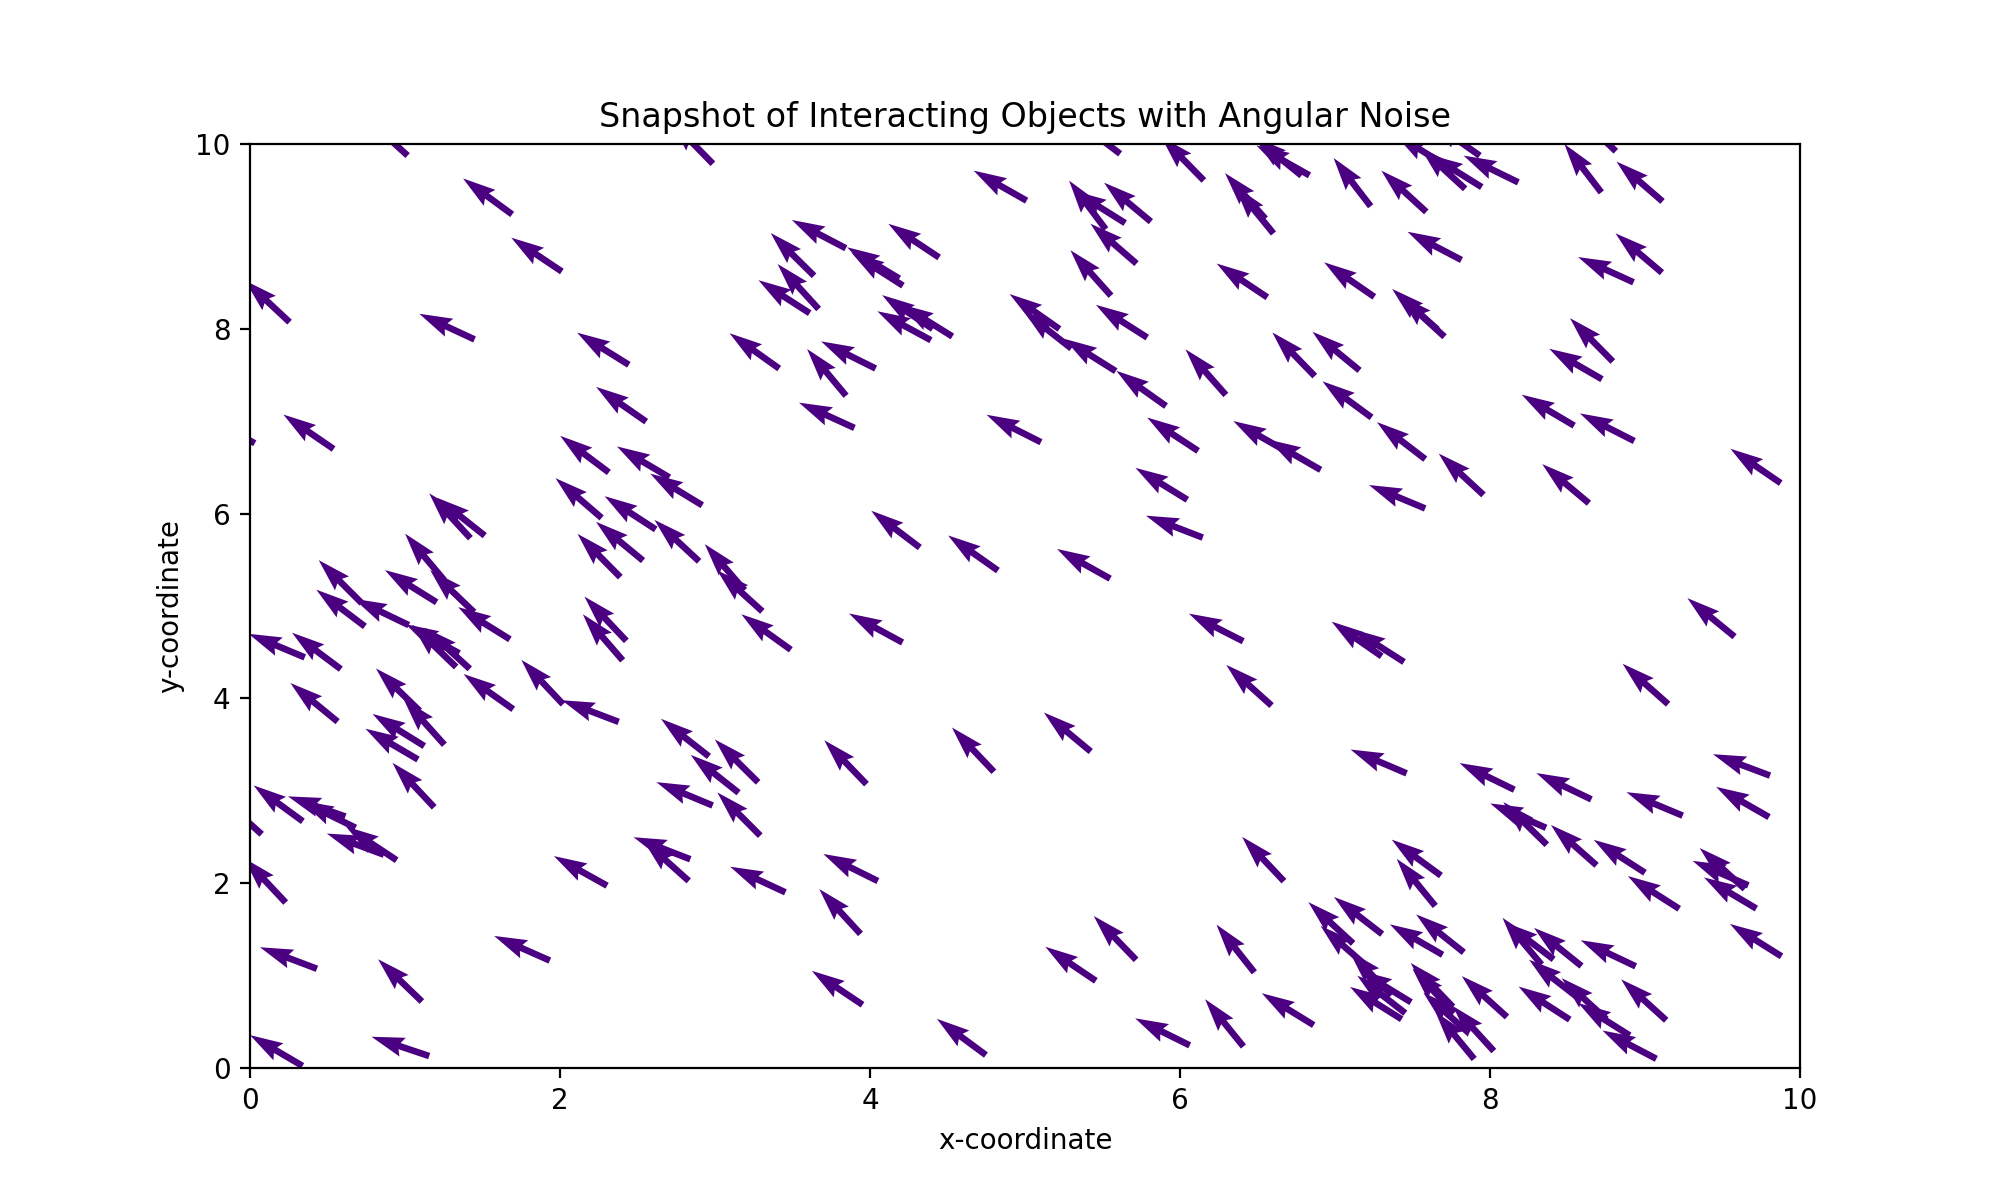

In [6]:
# 2 Problems, #2

import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.cm as cm 

%matplotlib notebook
from matplotlib.animation import FuncAnimation

def initialize(N, L):
    x = np.random.uniform(0, L, N)
    y = np.random.uniform(0, L, N)
    theta = np.random.uniform(-math.pi, math.pi, N)
    
    return x, y, theta

# initialize the state of the system with random positions and orientations
def initialize_system(N, L):
    positions = np.random.uniform(0, L, (N, 2))
    orientations = np.random.uniform(-np.pi, np.pi, N)
    return positions, orientations

def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        # find neighbors within radius r0, accounting for periodic boundary conditions
        dx = positions[:, 0] - positions[i, 0]
        dy = positions[:, 1] - positions[i, 1]
        dx = dx - L * np.round(dx / L)
        dy = dy - L * np.round(dy / L)
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # exclude self
        
        # calculate the average orientation of neighbors using formula provided in the manuscript
        if np.any(neighbors):  # if there are any neighbors
            average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                             np.cos(orientations[neighbors]).mean())
            new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
        else:
            # if no neighbors, just add random noise to orientation
            new_orientations[i] += np.random.uniform(-eta/2, eta/2)
            
    return new_orientations

# evolve the system with interactions
def evolve_system_with_interactions(positions, orientations, L, r0, eta, delta_t, time_steps):
    for _ in range(time_steps):
        # aligning orientations with neighbors
        orientations = align_orientation_with_neighbors(positions, orientations, L, r0, eta)
        
        # updating positions based on orientations
        positions[:, 0] = (positions[:, 0] + np.cos(orientations) * delta_t) % L
        positions[:, 1] = (positions[:, 1] + np.sin(orientations) * delta_t) % L
    
    return positions, orientations

def get_orientation_color(orientations, cmap='hsv'): 
    # generates color based on orientations
    # normalize the orientations between 0 and 1 for the colormap
    normalized_orientations = (orientations - np.min(orientations)) / (np.max(orientations) - np.min(orientations))
    # get the corresponding colormap
    colors = cm.get_cmap(cmap)(normalized_orientations)
    return colors

# parameters
L = 10
N = 200
r0 = 2  # interaction radius
eta = 0.5  # angular noise
delta_t = 1
time_steps = 250  # number of time steps to evolve the system

# initialize and evolve the system
positions, orientations = initialize_system(N, L)
positions, orientations = evolve_system_with_interactions(positions, orientations, L, r0, eta, delta_t, time_steps)

colors = get_orientation_color(orientations)

# plotting a snapshot of the system
plt.figure(figsize=(10, 6))
plt.quiver(positions[:, 0], positions[:, 1], np.cos(orientations), np.sin(orientations), color='indigo')
plt.xlim(0, L)
plt.ylim(0, L)
plt.title('Snapshot of Interacting Objects with Angular Noise')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

<IPython.core.display.Javascript object>


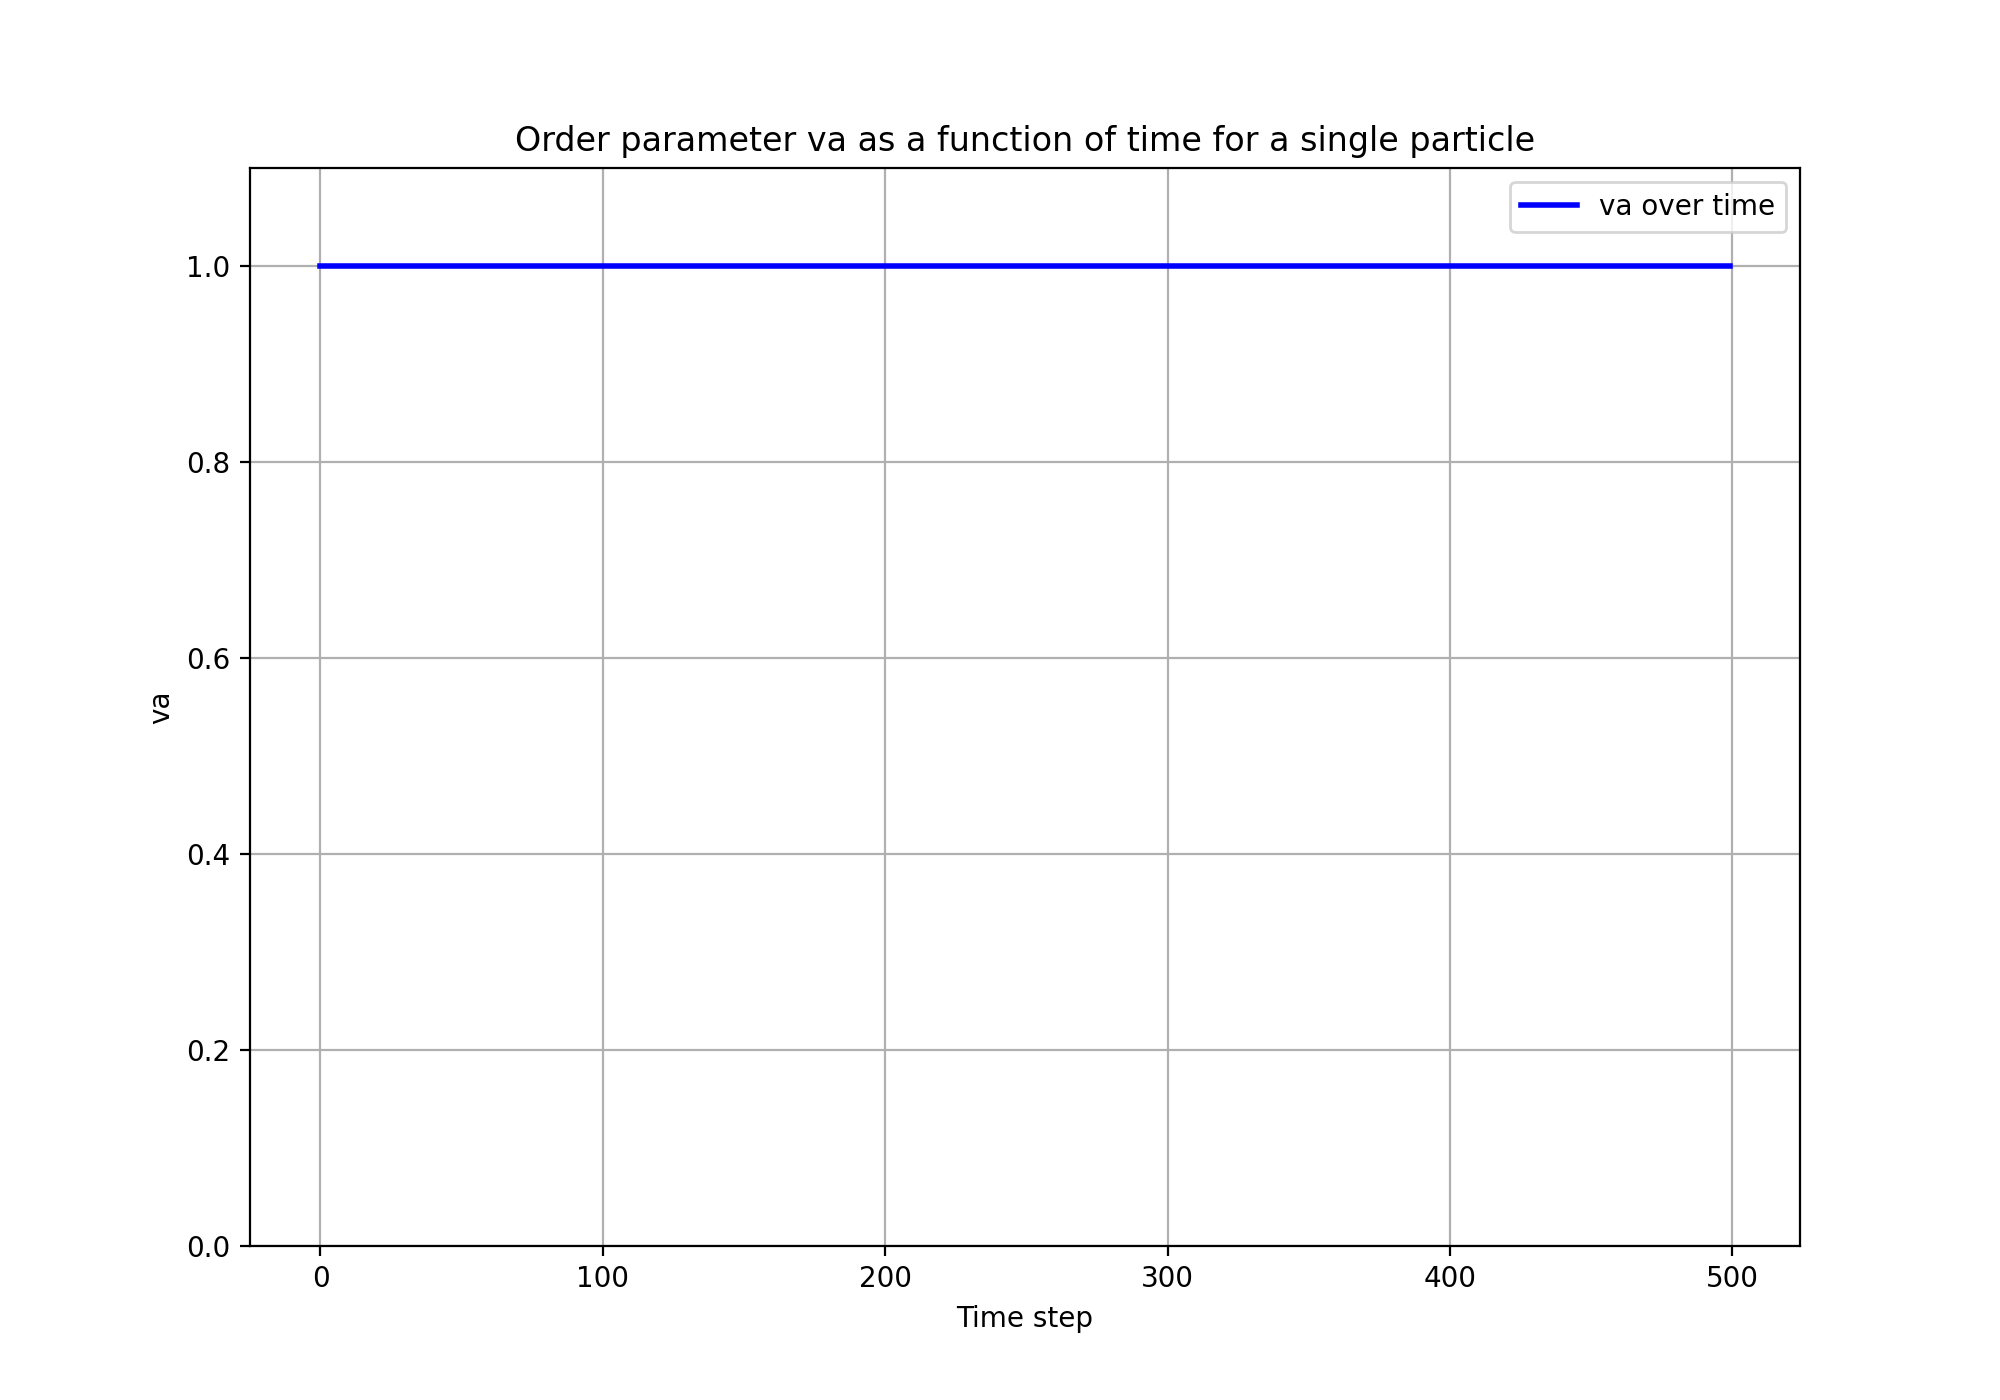

In [8]:
# 3 problems, #1

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the order parameter for a single particle
def order_parameter(velocity):
    # since there's only one particle, the order parameter is just the magnitude of the velocity
    # normalized by the speed
    return np.linalg.norm(velocity) / speed

# defining the speed and the constant orientation for the particle
speed = 1  # constant speed of the particle
orientation = 0  # constant orientation (direction) of the particle

# velocity vector from the speed and orientation
velocity = np.array([speed * np.cos(orientation), speed * np.sin(orientation)])

# order parameter, (constant in this case)
va = order_parameter(velocity)

# Number of time steps for the simulation
time_steps = 500

# creating a time array for plotting
time = np.arange(time_steps)

# plotting order parameter over time
plt.figure(figsize=(10, 7))
plt.plot(time, np.full(time.shape, va), label='va over time', color='blue', linewidth=2)
plt.title('Order parameter va as a function of time for a single particle')
plt.xlabel('Time step')
plt.ylabel('va')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>


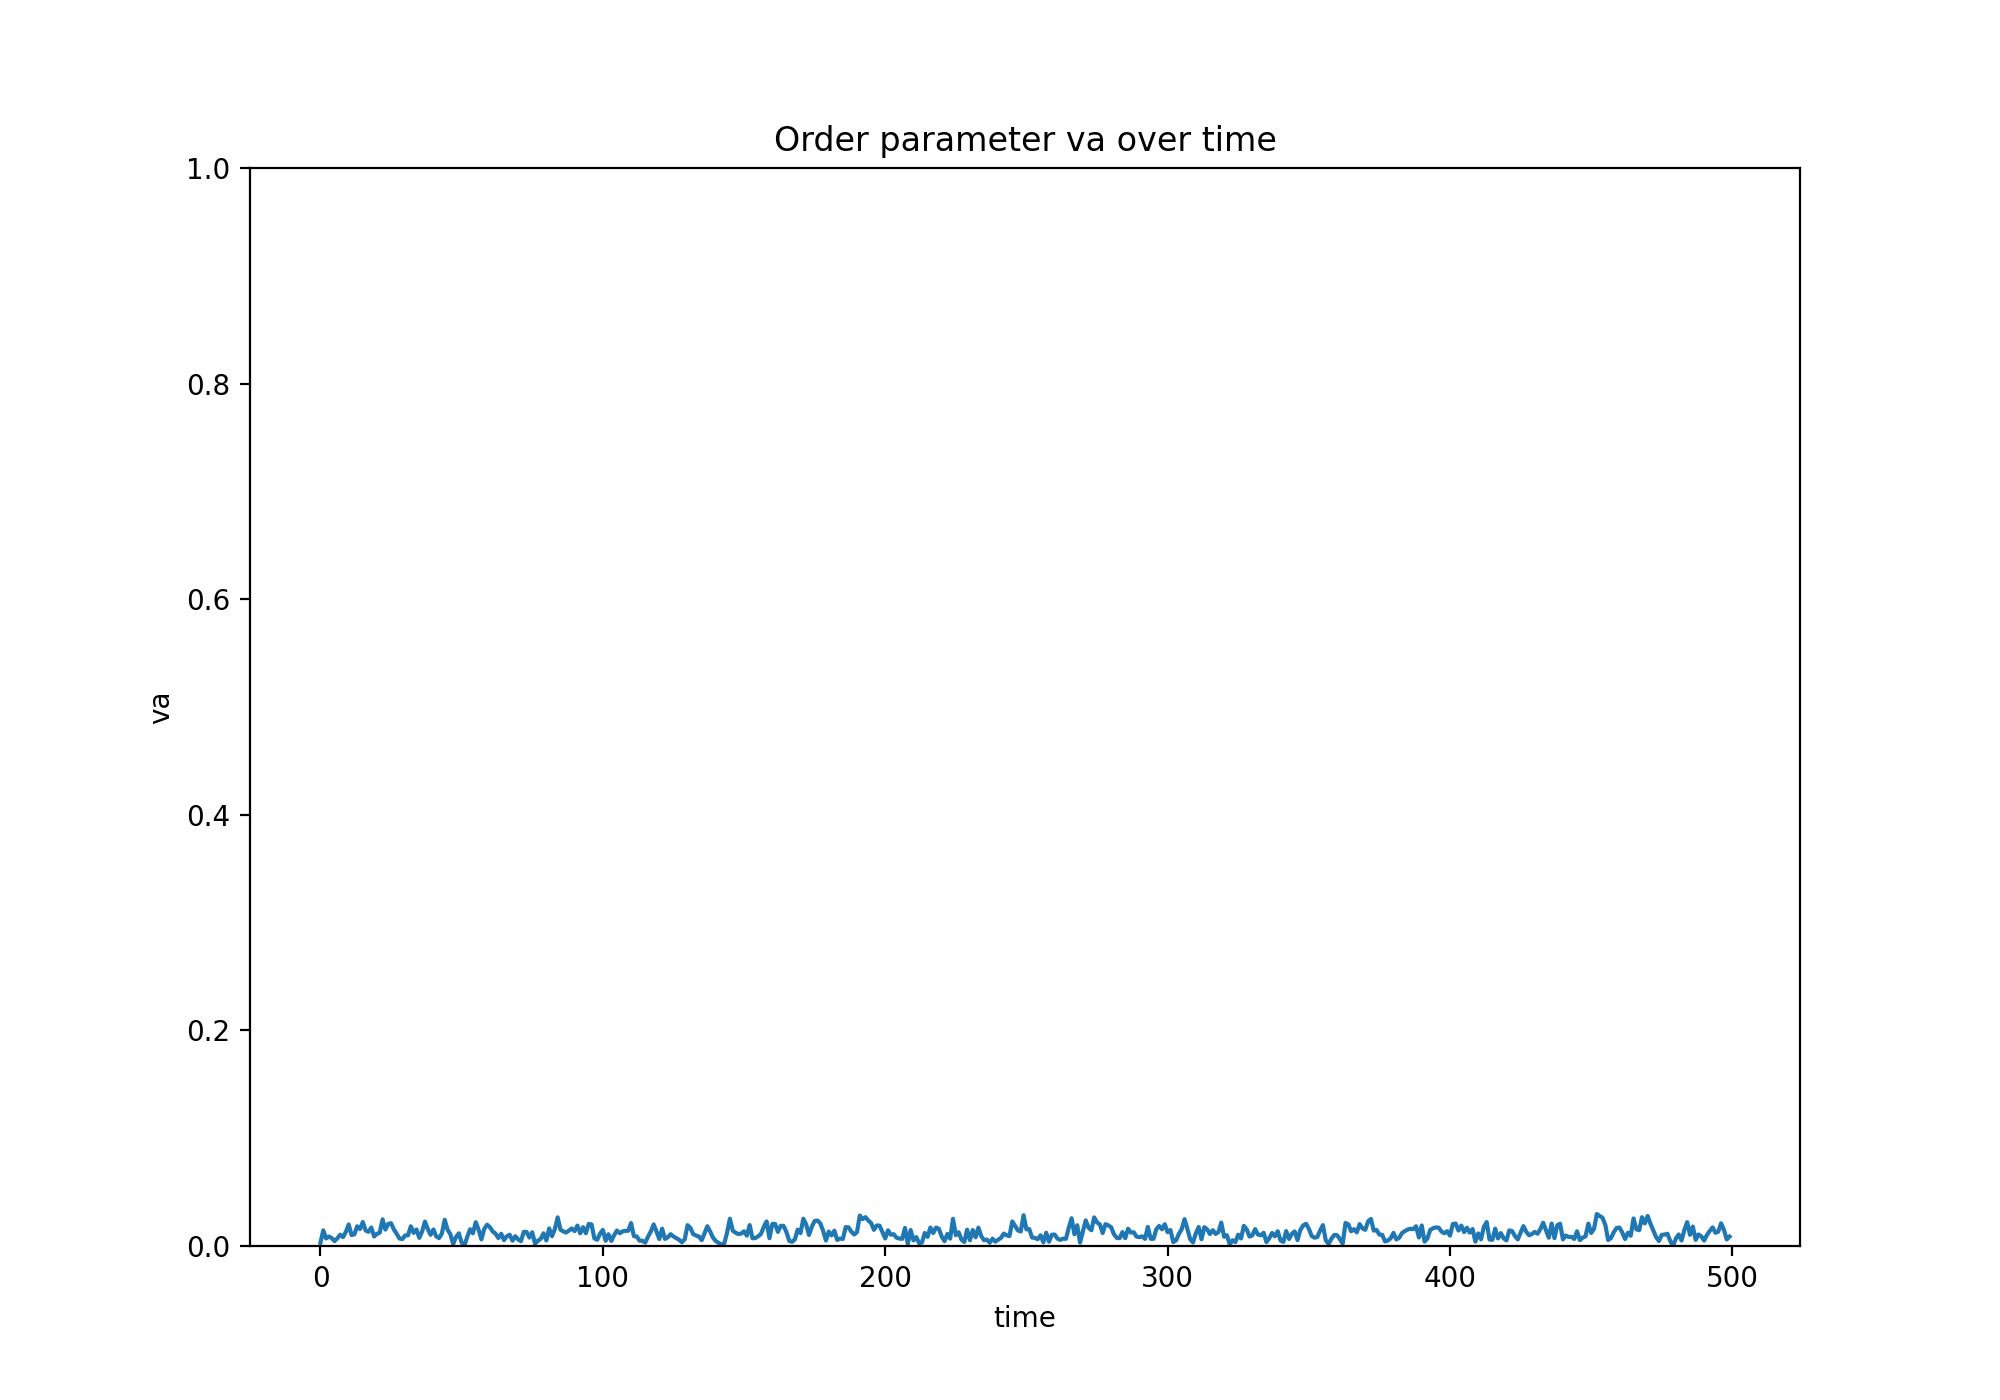

In [10]:
# 3 problems, #2

import numpy as np
import matplotlib.pyplot as plt

# parameters
N = 5000 
L = 25.0 
eta = 3.0 
n_steps = 500  # Corrected variable name here
speed = 1 

# randomly initialize orientations
orientations = np.random.uniform(-np.pi, np.pi, N)

# calculate the order parameter va
def order_parameter(orientations, N, speed):
    # components of the velocity vectors
    vx = np.cos(orientations)
    vy = np.sin(orientations)
    
    # sums of velocity vector
    vx_sum = np.sum(vx)
    vy_sum = np.sum(vy)
    
    # calc the magnitude of the sum of the velocity vectors and normalize by N*speed
    va = np.sqrt(vx_sum**2 + vy_sum**2) / (N * speed)
    return va

# store the va values over time
va_values = np.zeros(n_steps)  # corrected variable name here

for t in range(n_steps):  # corrected variable name here
    # apply angular noise to orientation of each particle
    orientations += np.random.uniform(-eta/2, eta/2, N)
    
    # ensuring orientations remain between -pi and pi
    orientations = (orientations + np.pi) % (2 * np.pi) - np.pi
    
    # va for this time step
    va_values[t] = order_parameter(orientations, N, speed)
    
# plot the result
plt.figure(figsize=(10, 7))
plt.plot(va_values)
plt.xlabel('time')
plt.ylabel('va')
plt.ylim(0, 1)
plt.title('Order parameter va over time')
plt.show()
   

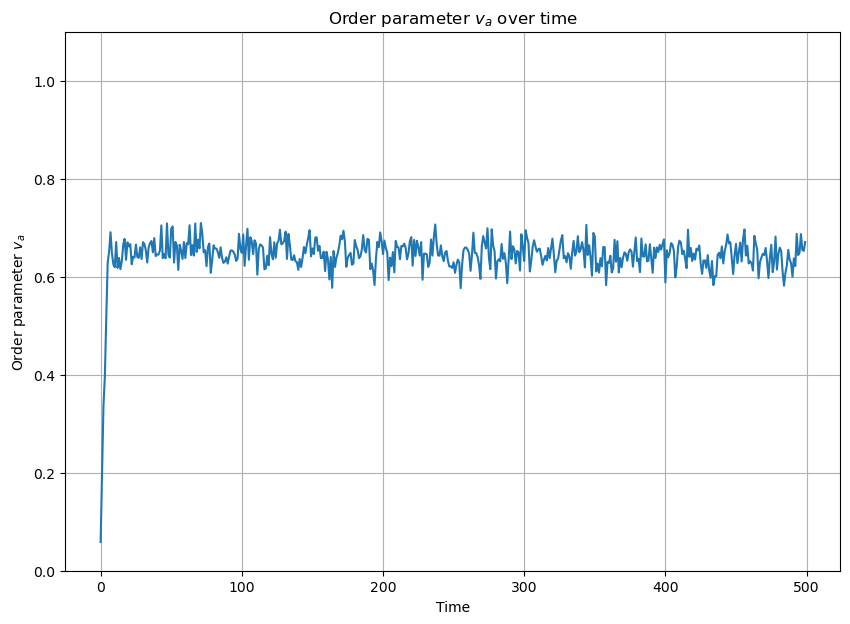

In [9]:
# 3 problems, #3

import numpy as np
import matplotlib.pyplot as plt
import math

# parameters:
L = 5
N = 200
r0 = 1  # interaction radius
eta = 3  # angular noise
delta_t = 1
time_steps = 500  # number of time steps to evolve system
v = 1

def initialize_system(N, L):
    positions = np.random.uniform(0, L, (N, 2))
    orientations = np.random.uniform(-np.pi, np.pi, N)
    return positions, orientations

def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = positions[:, 0] - positions[i, 0]
        dy = positions[:, 1] - positions[i, 1]
        dx = dx - L * np.round(dx / L)
        dy = dy - L * np.round(dy / L)
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # exclude self
        
        if np.any(neighbors):
            average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                             np.cos(orientations[neighbors]).mean())
            new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
        else:
            new_orientations[i] += np.random.uniform(-eta/2, eta/2)
            
    return new_orientations

def evolve_system_with_interactions(v, positions, orientations, L, r0, eta, delta_t, time_steps):
    va_values = []
    
    for _ in range(time_steps):
        orientations = align_orientation_with_neighbors(positions, orientations, L, r0, eta)
        positions[:, 0] = (positions[:, 0] + v*np.cos(orientations) * delta_t) % L
        positions[:, 1] = (positions[:, 1] + v*np.sin(orientations) * delta_t) % L
        
        # calculate order parameter (va) at each time step
        vx = np.cos(orientations)
        vy = np.sin(orientations)
        vx_sum = np.sum(vx)
        vy_sum = np.sum(vy)
        va = np.sqrt(vx_sum**2 + vy_sum**2) / (N * v)
        va_values.append(va)
    
    return positions, orientations, va_values


# initialize and evolve system
positions, orientations = initialize_system(N, L)
positions, orientations, va_values = evolve_system_with_interactions(v, positions, orientations, L, r0, eta, delta_t, time_steps)

# plot va as a function of time
plt.figure(figsize=(10, 7))
plt.plot(va_values)
plt.xlabel('Time')
plt.ylabel('Order parameter $v_a$')
plt.ylim(0, 1.1)
plt.title('Order parameter $v_a$ over time')
plt.grid(True)
plt.show()

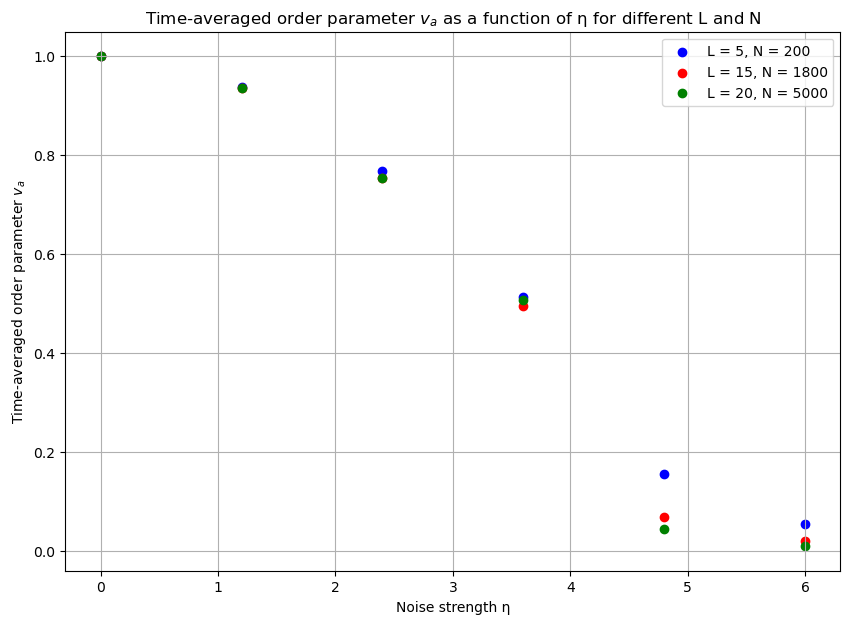

In [3]:
# 3 problems, #4

import numpy as np
import matplotlib.pyplot as plt
import math

# Define the simulation function
def simulate_system(v, N, L, r0, eta_values, delta_t, time_steps, steady_state_time):
    def initialize_system(N, L):
        positions = np.random.uniform(0, L, (N, 2))
        orientations = np.random.uniform(-np.pi, np.pi, N)
        return positions, orientations

    def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
        N = len(positions)
        new_orientations = np.copy(orientations)

        for i in range(N):
            dx = positions[:, 0] - positions[i, 0]
            dy = positions[:, 1] - positions[i, 1]
            dx = dx - L * np.round(dx / L)
            dy = dy - L * np.round(dy / L)
            distances = np.sqrt(dx**2 + dy**2)
            neighbors = (distances < r0) & (distances > 0)  # exclude self

            if np.any(neighbors):
                average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                                 np.cos(orientations[neighbors]).mean())
                new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
            else:
                new_orientations[i] += np.random.uniform(-eta/2, eta/2)

        return new_orientations

    average_vas = []

    for eta in eta_values:
        positions, orientations = initialize_system(N, L)
        va_values = []

        for _ in range(time_steps):
            orientations = align_orientation_with_neighbors(positions, orientations, L, r0, eta)
            positions[:, 0] = (positions[:, 0] + v*np.cos(orientations) * delta_t) % L
            positions[:, 1] = (positions[:, 1] + v*np.sin(orientations) * delta_t) % L

            vx = np.cos(orientations)
            vy = np.sin(orientations)
            vx_sum = np.sum(vx)
            vy_sum = np.sum(vy)
            va = np.sqrt(vx_sum**2 + vy_sum**2) / (N * v)
            va_values.append(va)

        average_va = np.median(va_values[-steady_state_time:])
        average_vas.append(average_va)

    return eta_values, average_vas

# Parameters
parameters = [
    {"L": 5, "N": 200, "color": "blue"},
    {"L": 15, "N": 1800, "color": "red"},
    {"L": 20, "N": 5000, "color": "green"}
]

r0 = 1
delta_t = 1
v = 1
time_steps = 500
steady_state_time = 100  # time after which the system reaches steady state
eta_values = np.linspace(0, 6, 6)  # generate 6 values of η between 0 and 6

# Plotting
plt.figure(figsize=(10, 7))
for param in parameters:
    eta_values, average_vas = simulate_system(v, param["N"], param["L"], r0, eta_values, delta_t, time_steps, steady_state_time)
    plt.scatter(eta_values, average_vas, color=param["color"], label=f'L = {param["L"]}, N = {param["N"]}')

plt.xlabel('Noise strength η')
plt.ylabel('Time-averaged order parameter $v_a$')
plt.title('Time-averaged order parameter $v_a$ as a function of η for different L and N')
plt.legend()
plt.grid(True)
plt.show()


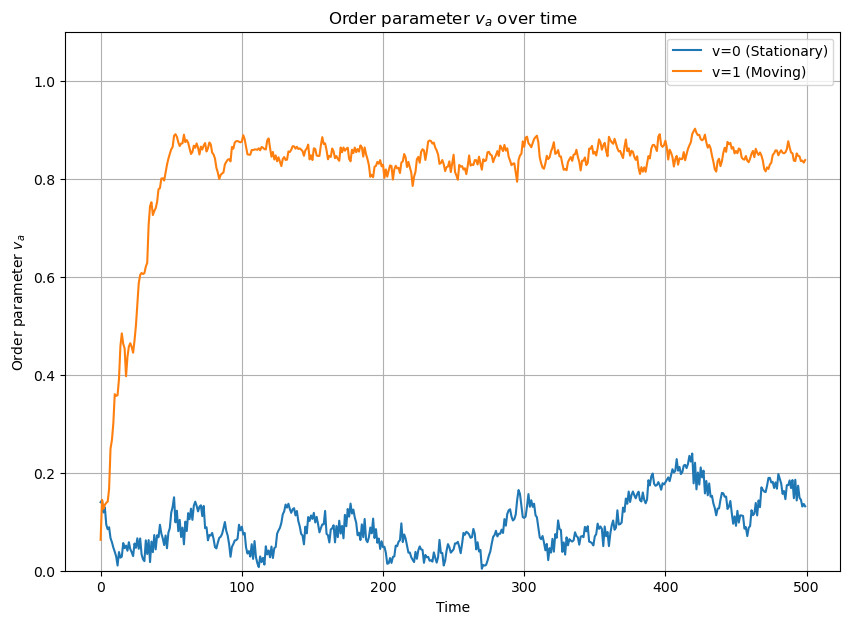

In [13]:
#3.6

import numpy as np
import matplotlib.pyplot as plt

# parameters:
L = 20
N = 200
r0 = 1  # interaction radius
eta = 1  # angular noise
delta_t = 1
time_steps = 500  # number of time steps to evolve system

# Function to initialize the system with positions and orientations
def initialize_system(N, L):
    positions = np.random.uniform(0, L, (N, 2))
    orientations = np.random.uniform(-np.pi, np.pi, N)
    return positions, orientations

# Function to align orientation with neighbors considering periodic boundary conditions
def align_orientation_with_neighbors(positions, orientations, L, r0, eta):
    N = len(positions)
    new_orientations = np.copy(orientations)
    
    for i in range(N):
        dx = positions[:, 0] - positions[i, 0]
        dy = positions[:, 1] - positions[i, 1]
        dx = dx - L * np.round(dx / L)
        dy = dy - L * np.round(dy / L)
        distances = np.sqrt(dx**2 + dy**2)
        neighbors = (distances < r0) & (distances > 0)  # exclude self
        
        if np.any(neighbors):
            average_orientation = np.arctan2(np.sin(orientations[neighbors]).mean(),
                                             np.cos(orientations[neighbors]).mean())
            new_orientations[i] = average_orientation + np.random.uniform(-eta/2, eta/2)
        else:
            new_orientations[i] += np.random.uniform(-eta/2, eta/2)
            
    return new_orientations

# Function to evolve the system with interactions and calculate the order parameter
def evolve_system_with_interactions(v, positions, orientations, L, r0, eta, delta_t, time_steps):
    va_values = []
    
    for _ in range(time_steps):
        orientations = align_orientation_with_neighbors(positions, orientations, L, r0, eta)
        positions[:, 0] = (positions[:, 0] + v*np.cos(orientations) * delta_t) % L
        positions[:, 1] = (positions[:, 1] + v*np.sin(orientations) * delta_t) % L
        # calc va at each time step using complex exponential form
        order_param = np.sum(np.exp(1j * orientations)) / N
        va = np.abs(order_param)
        va_values.append(va)
    
    return va_values

# Initialize systems
positions_v0, orientations_v0 = initialize_system(N, L)
positions_v1, orientations_v1 = initialize_system(N, L)

# Evolve systems and calculate order par+ameters
va_values_v0 = evolve_system_with_interactions(0, positions_v0, orientations_v0, L, r0, eta, delta_t, time_steps)
va_values_v1 = evolve_system_with_interactions(1, positions_v1, orientations_v1, L, r0, eta, delta_t, time_steps)

# Plot va as a function of time for both stationary and moving particles
plt.figure(figsize=(10, 7))
plt.plot(va_values_v0, label='v=0 (Stationary)')
plt.plot(va_values_v1, label='v=1 (Moving)')
plt.xlabel('Time')
plt.ylabel('Order parameter $v_a$')
plt.ylim(0, 1.1)
plt.title('Order parameter $v_a$ over time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Predator Prey Simulation Starter Code

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation
import math

# Parameters
L = 10
N_predators = 20
N_prey = 180
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
eta_prey = 0.5  # Angular noise for prey
delta_t = 1
time_steps = 250  # Number of time steps to evolve the system

# Initialize system with predators and prey
def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

# Modified update function for predator-prey interactions
def evolve_system_with_interactions(positions_predators, orientations_predators, positions_prey, orientations_prey, L, r0_predator, r0_prey, eta_prey, delta_t, time_steps):
    for _ in range(time_steps):
        # implement the dynamics of predators chasing prey and prey avoiding predators, along with any alignment behavior among the prey. Ex) Calculating distances between predators and prey and updating their positions and orientations based on these interactions.
        # Update positions and orientations for both predators and prey here, implement the specific logic for interaction, chasing, and avoiding
        pass

    return positions_predators, orientations_predators, positions_prey, orientations_prey

# initialize and evolve the system
positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)
positions_predators, orientations_predators, positions_prey, orientations_prey = evolve_system_with_interactions(positions_predators, orientations_predators, positions_prey, orientations_prey, L, r0_predator, r0_prey, eta_prey, delta_t, time_steps)

# Visualization (adapt separately to plot predators and prey)

<IPython.core.display.Javascript object>


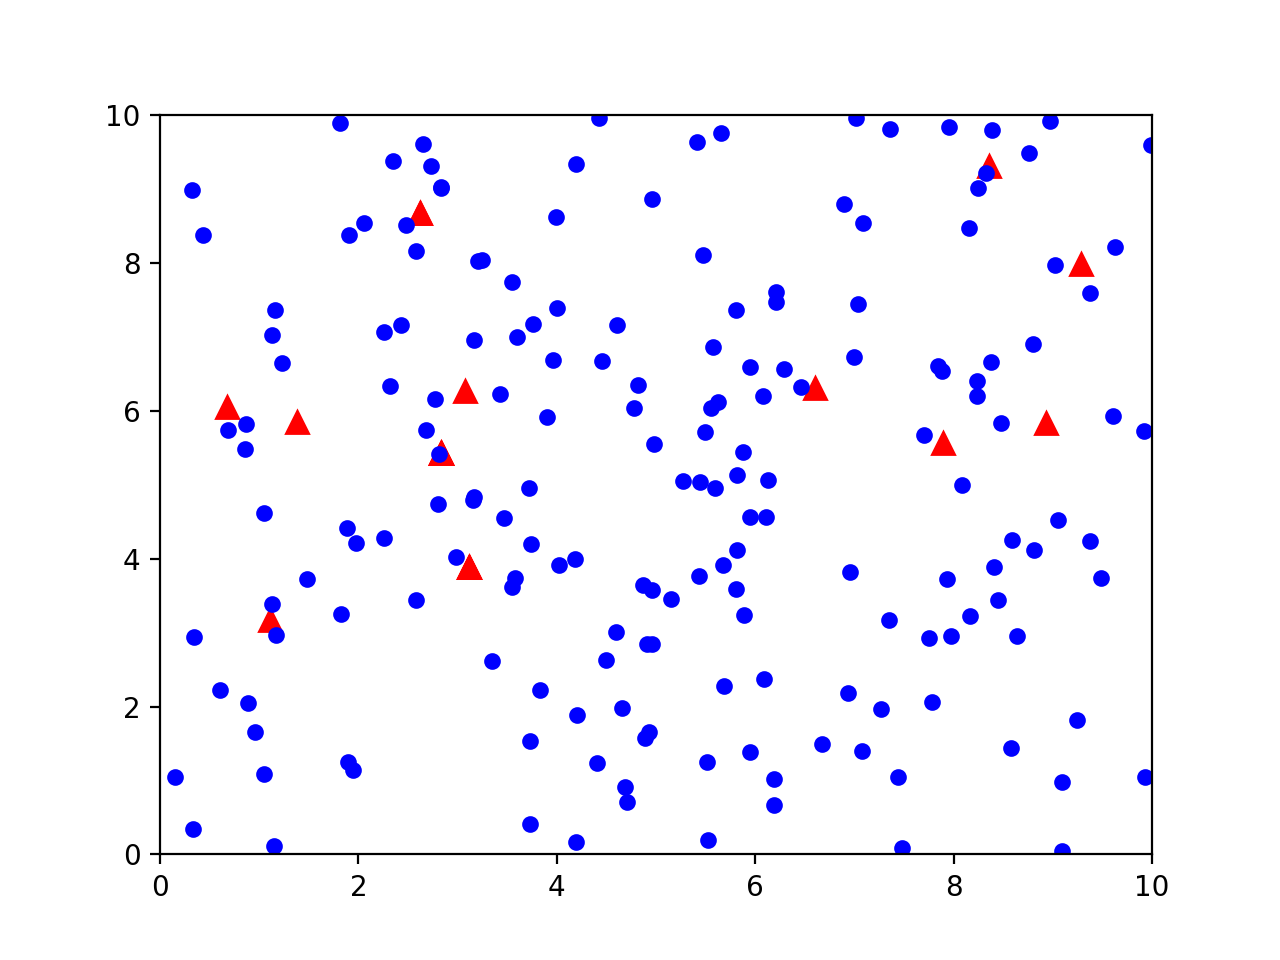

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.animation import FuncAnimation

# Parameters
L = 10
N_predators = 20
N_prey = 180
r0_predator = 1.5  # Predator interaction radius
r0_prey = 2  # Prey interaction radius
vision_angle_predator = np.pi / 2  # 90 degrees vision for predators
eta_prey = 0.5  # Angular noise for prey
delta_t = 1
speed_predator = 0.05
speed_prey = 0.03

def initialize_system(N_predators, N_prey, L):
    positions_predators = np.random.uniform(0, L, (N_predators, 2))
    orientations_predators = np.random.uniform(-np.pi, np.pi, N_predators)
    positions_prey = np.random.uniform(0, L, (N_prey, 2))
    orientations_prey = np.random.uniform(-np.pi, np.pi, N_prey)
    return positions_predators, orientations_predators, positions_prey, orientations_prey

def update_orientation_and_position(positions, orientations, speeds, L):
    dx = np.cos(orientations) * speeds * delta_t
    dy = np.sin(orientations) * speeds * delta_t
    positions[:, 0] += dx
    positions[:, 1] += dy
    positions[:, 0] = positions[:, 0] % L
    positions[:, 1] = positions[:, 1] % L
    return positions

def update_predator_orientation(positions_predator, positions_prey, orientations_predator, vision_angle, r0):
    for i, predator in enumerate(positions_predator):
        vectors_to_prey = positions_prey - predator
        distances = np.linalg.norm(vectors_to_prey, axis=1)
        angles_to_prey = np.arctan2(vectors_to_prey[:, 1], vectors_to_prey[:, 0])
        angle_diffs = np.abs(angles_to_prey - orientations_predator[i]) % (2 * np.pi)
        # Check if prey is within vision cone and interaction radius
        in_vision = (angle_diffs < vision_angle / 2) | (angle_diffs > 2 * np.pi - vision_angle / 2)
        in_range = distances < r0
        prey_indices = np.where(in_vision & in_range)[0]
        if prey_indices.size > 0:
            nearest_prey_index = prey_indices[np.argmin(distances[prey_indices])]
            vector_to_nearest_prey = vectors_to_prey[nearest_prey_index]
            orientations_predator[i] = np.arctan2(vector_to_nearest_prey[1], vector_to_nearest_prey[0])
    return orientations_predator

# Initialize system
positions_predators, orientations_predators, positions_prey, orientations_prey = initialize_system(N_predators, N_prey, L)

fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, L)
predators, = ax.plot([], [], 'r^', markersize=8)  # Red triangles for predators
prey, = ax.plot([], [], 'bo', markersize=5)  # Blue circles for prey

def init():
    predators.set_data([], [])
    prey.set_data([], [])
    return predators, prey,

def animate(i):
    global positions_predators, orientations_predators, positions_prey, orientations_prey
    
    # Update predator orientations to chase prey
    orientations_predators = update_predator_orientation(positions_predators, positions_prey, orientations_predators, vision_angle_predator, r0_predator)
    
    # Simulate prey evasion and random movement (simplified)
    orientations_prey += np.random.uniform(-eta_prey, eta_prey, N_prey)
    
    # Update positions
    positions_predators = update_orientation_and_position(positions_predators, orientations_predators, np.full(N_predators, speed_predator), L)
    positions_prey = update_orientation_and_position(positions_prey, orientations_prey, np.full(N_prey, speed_prey), L)
    
    predators.set_data(positions_predators[:, 0], positions_predators[:, 1])
    prey.set_data(positions_prey[:, 0], positions_prey[:, 1])
    return predators, prey,

ani = FuncAnimation(fig, animate, init_func=init, blit=True, interval=100, frames=200)

plt.show()